In [1]:
import torch
import numpy as np

from utils.utils import *
from utils.dataloader import *
from utils.nop import *

import matplotlib.pyplot as plt

/home/marlon/miniconda3/envs/torch39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data and model location
data_path = 'data/era5_Santos_2022-2023.nc'
bath_path = 'data/era5_Santos_2022-2023_bath.nc'

model_path_base = 'models/model_nm600_1250_ds300.0_r350.0_w20_kw40_d8_nc.pt'

device = torch.device('cuda')

ncs = [10, 20, 30, 40, 50, 70, 100, 120, 150, 200, 250, 300, 400, 500, 600, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2552]

In [3]:
loss = []
loss_val = []

for nc in ncs:
    model_path = model_path_base.replace('_nc',f'_nc{nc}')
    model_data = torch.load(model_path, map_location=device)
    loss.append(model_data['loss'][-1])
    loss_val.append(model_data['loss_val'][-1])

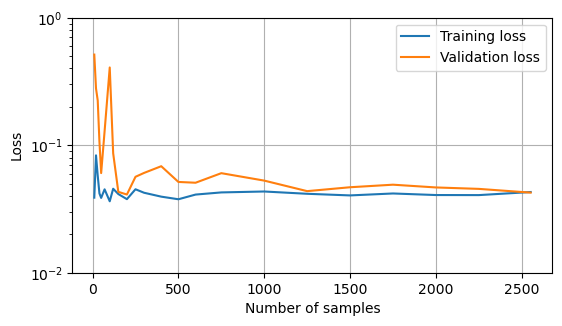

In [15]:
# Plot loss during training

plt.figure(figsize=(6,3))
plt.semilogy(ncs,loss,label='Training loss')
plt.semilogy(ncs,loss_val,label='Validation loss')
plt.xlabel('Number of samples')
plt.ylabel('Loss')
plt.legend()
plt.ylim(1e-2,1)
plt.grid()

plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1)
plt.savefig('loss_samples.pdf')